✅ Data successfully loaded.
✅ Engineered features created.
✅ Data split into 6843 training samples and 2282 testing samples.

Training the RandomForestClassifier model...
✅ Model training complete.


--- Model Evaluation Results ---
Accuracy: 98.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2135
           1       0.97      0.80      0.88       147

    accuracy                           0.99      2282
   macro avg       0.98      0.90      0.93      2282
weighted avg       0.99      0.99      0.98      2282



C:\Users\Asus\AppData\Local\Temp\ipykernel_14744\3656488760.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')


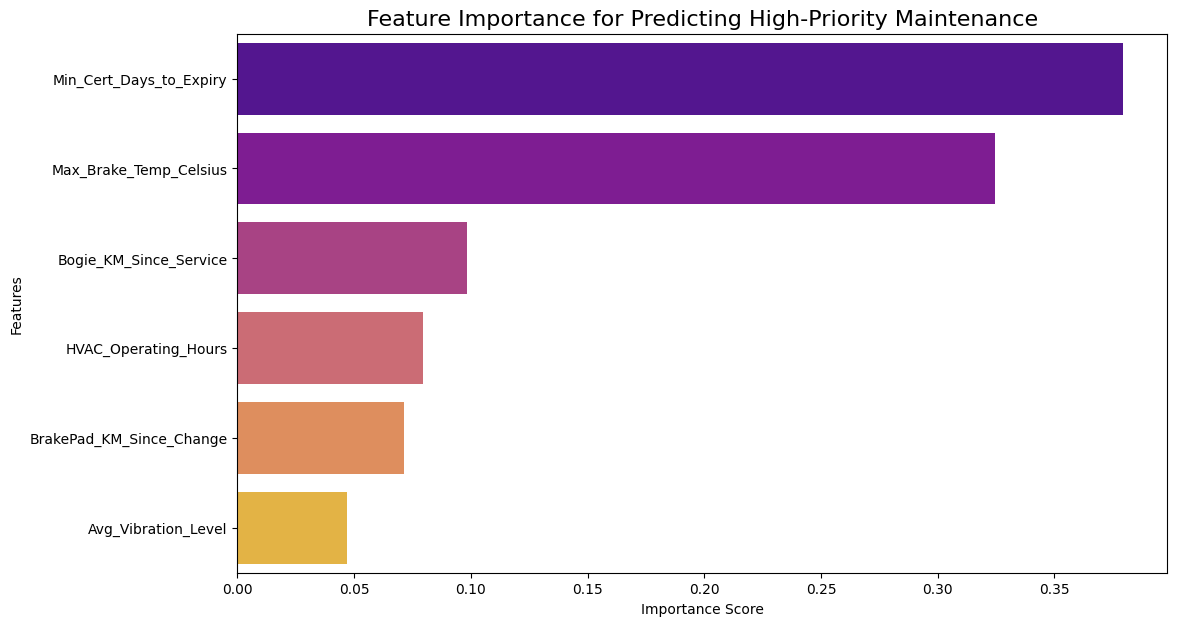


Model training and evaluation complete!


In [1]:
# ==============================================================================
# STEP 1: LOAD LIBRARIES AND DATA
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset from your project folder
file_path = 'kmrl_enhanced_dataset.csv'
df = pd.read_csv(file_path)

# --- Data Cleaning and Type Conversion ---
df['Date'] = pd.to_datetime(df['Date'])
df['RollingStock_Cert_Expiry'] = pd.to_datetime(df['RollingStock_Cert_Expiry'])
df['Signal_Cert_Expiry'] = pd.to_datetime(df['Signal_Cert_Expiry'])
df['Telecom_Cert_Expiry'] = pd.to_datetime(df['Telecom_Cert_Expiry'])

print("✅ Data successfully loaded.")


# ==============================================================================
# STEP 2: RE-CREATE ENGINEERED FEATURES
# ==============================================================================
# We recreate the features from the previous notebook to make this script self-contained.

df['RS_Cert_Days_to_Expiry'] = (df['RollingStock_Cert_Expiry'] - df['Date']).dt.days
df['Signal_Cert_Days_to_Expiry'] = (df['Signal_Cert_Expiry'] - df['Date']).dt.days
df['Telecom_Cert_Days_to_Expiry'] = (df['Telecom_Cert_Expiry'] - df['Date']).dt.days

# Create a single 'Risk' feature for the closest expiry date
df['Min_Cert_Days_to_Expiry'] = df[['RS_Cert_Days_to_Expiry', 'Signal_Cert_Days_to_Expiry', 'Telecom_Cert_Days_to_Expiry']].min(axis=1)

print("✅ Engineered features created.")


# ==============================================================================
# STEP 3: PREPARE DATA FOR MODELING
# ==============================================================================
# Here, we define what we want to predict (the target) and what data the model
# should use to make that prediction (the features).

# --- Define the Prediction Target ---
# We want to predict if a train will have a 'High' priority job card.
# This creates a new column with 1 for 'High' priority, and 0 otherwise.
df['Target'] = (df['JobCard_Priority'] == 'High').astype(int)

# --- Select Features and Target ---
# These are the columns the model will use to make its predictions.
features = [
    'BrakePad_KM_Since_Change',
    'Bogie_KM_Since_Service',
    'HVAC_Operating_Hours',
    'Avg_Vibration_Level',
    'Max_Brake_Temp_Celsius',
    'Min_Cert_Days_to_Expiry', # Our powerful engineered feature!
]

X = df[features]
y = df['Target']

# --- Split Data into Training and Testing Sets ---
# The model learns from the training set and is evaluated on the unseen testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"✅ Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")


# ==============================================================================
# STEP 4: TRAIN AND EVALUATE THE MODEL
# ==============================================================================
# We use a RandomForestClassifier, a powerful and popular choice for this problem.

print("\nTraining the RandomForestClassifier model...")
# We use class_weight='balanced' to help the model treat the rare 'High' priority cases with more importance.
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
print("✅ Model training complete.")

# --- Evaluate the Model's Performance ---
y_pred = model.predict(X_test)

print("\n\n--- Model Evaluation Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
# The report shows how well the model did for both classes (0 and 1). 'precision' and 'recall' are key metrics.
print(classification_report(y_test, y_pred))


# ==============================================================================
# STEP 5: UNDERSTAND THE MODEL'S DECISIONS
# ==============================================================================
# Let's see which features the model found most important for its predictions.

plt.figure(figsize=(12, 7))
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.title('Feature Importance for Predicting High-Priority Maintenance', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\nModel training and evaluation complete!")